In [3]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.pyplot import suptitle
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score


from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


import plotly.express as px

In [4]:
df = pd.read_csv('fetal_health.csv', delimiter=',')
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [5]:
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [6]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [7]:
df.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

## Exploratory Data Analysis

In [9]:
#dropping unnecessary columns 
df2= df.drop(['histogram_width', 'histogram_min','histogram_max','histogram_number_of_peaks', 'histogram_number_of_zeroes','histogram_mode', 'histogram_mean','histogram_median','histogram_variance', 'histogram_tendency'], axis=1)

In [10]:
df2['fetal_health'].describe()

count    2126.000000
mean        1.304327
std         0.614377
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: fetal_health, dtype: float64

In [11]:
df2['fetal_health'].value_counts()

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

<AxesSubplot:ylabel='Frequency'>

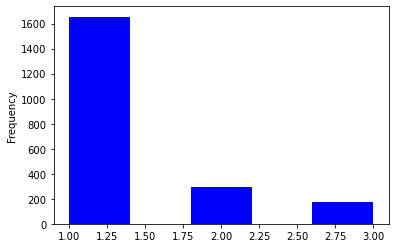

In [12]:
df2['fetal_health'].plot.hist(bins=5, color='blue')

<AxesSubplot:>

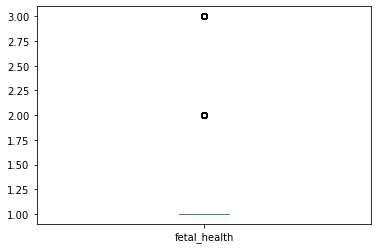

In [13]:
df2['fetal_health'].plot.box()
#df.plot.box(y=['fetal_health'])

In [14]:
df2['fetal_health'].value_counts()

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

Text(0.5, 0.98, 'Fetal Health Classification')

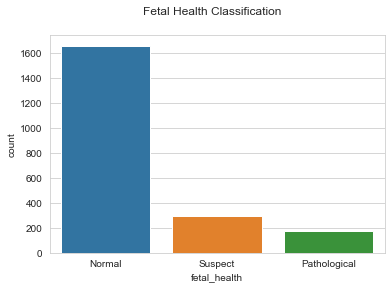

In [15]:
# Historgam on fetal health
sns.set_style(style='whitegrid')
countplot = sns.countplot(x='fetal_health', data=df)
#countplot.set_xlabel("Fetal Health")
countplot.set_xticklabels(["Normal", "Suspect", "Pathological"])
suptitle("Fetal Health Classification")

C:\Users\etcat\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fetal_health', ylabel='Density'>

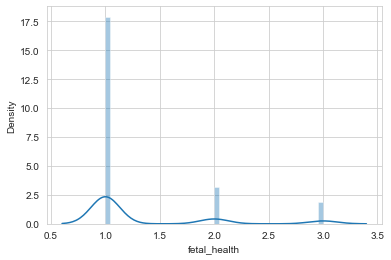

In [15]:
sns.set_style('whitegrid')
sns.distplot(df['fetal_health'])

In [16]:
corr = df2.corr()
corr

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,fetal_health
baseline value,1.000000,-0.080560,-0.033436,-0.146373,-0.159032,-0.053518,-0.104597,0.305570,-0.279607,0.285630,-0.032091,0.148151
accelerations,-0.080560,1.000000,0.048235,0.089674,-0.108615,-0.043018,-0.127749,-0.279577,0.207170,-0.373943,-0.142363,-0.364066
fetal_movement,-0.033436,0.048235,1.000000,-0.068779,0.049228,-0.010976,0.265922,-0.103715,0.121314,-0.074096,0.011047,0.088010
uterine_contractions,-0.146373,0.089674,-0.068779,1.000000,0.285079,0.006788,0.077036,-0.232811,0.289679,-0.306608,-0.066058,-0.204894
light_decelerations,-0.159032,-0.108615,0.049228,0.285079,1.000000,0.107573,0.225611,-0.119152,0.562170,-0.271282,-0.242932,0.058870
severe_decelerations,-0.053518,-0.043018,-0.010976,0.006788,0.107573,1.000000,0.012395,0.033949,0.034130,-0.030770,-0.037667,0.131934
prolongued_decelerations,-0.104597,-0.127749,0.265922,0.077036,0.225611,0.012395,1.000000,0.046226,0.267011,-0.137333,-0.226514,0.484859
abnormal_short_term_variability,0.305570,-0.279577,-0.103715,-0.232811,-0.119152,0.033949,0.046226,1.000000,-0.430705,0.459413,-0.315105,0.471191
mean_value_of_short_term_variability,-0.279607,0.207170,0.121314,0.289679,0.562170,0.034130,0.267011,-0.430705,1.000000,-0.470259,0.073892,-0.103382
percentage_of_time_with_abnormal_long_term_variability,0.285630,-0.373943,-0.074096,-0.306608,-0.271282,-0.030770,-0.137333,0.459413,-0.470259,1.000000,-0.171114,0.426146


<AxesSubplot:>

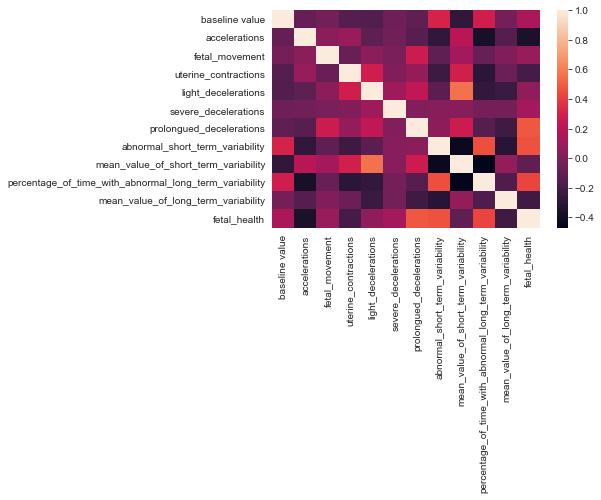

In [17]:
sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns)

<AxesSubplot:>

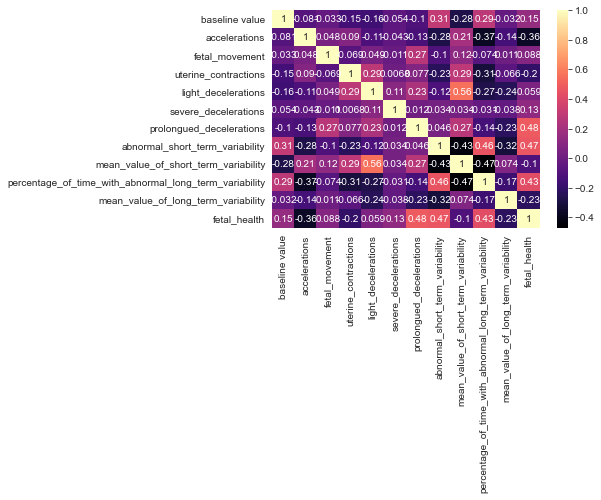

In [18]:
sns.heatmap(df2.corr(), annot=True, cmap='magma')

<AxesSubplot:>

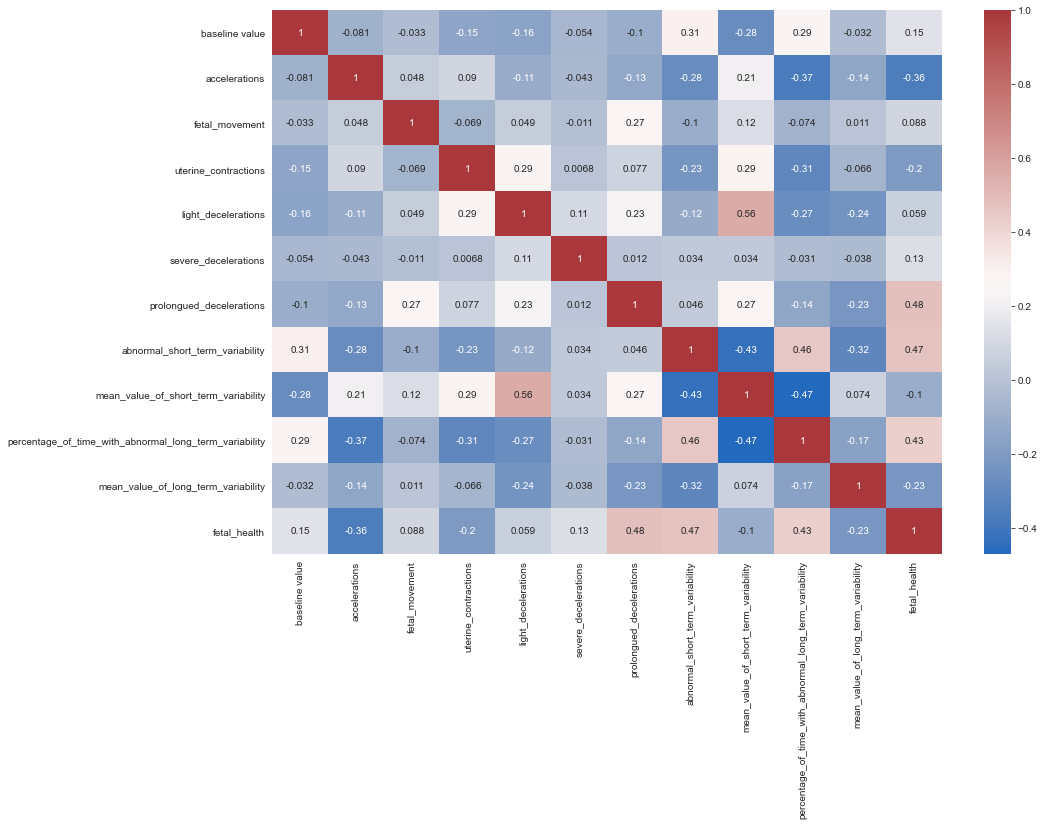

In [19]:
#correlation matrix

corr_df = df2.corr()
fig, axes = plt.subplots(figsize=(15,10))
sns.heatmap(corr_df, annot=True, cmap = 'vlag')

In [27]:
corr_df2 = corr_df['fetal_health'].sort_values(ascending=False).head(20).to_frame()
corr_df2
#color = sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)

corr_table = corr_df2.style.background_gradient(cmap='vlag')
corr_table
#looking at prolongued_decelerations, abnormal_short_term_variability, and percent of time with abnormal long term variability correlated to fetal health.

,fetal_health
fetal_health,1.000000
prolongued_decelerations,0.484859
abnormal_short_term_variability,0.471191
percentage_of_time_with_abnormal_long_term_variability,0.426146
baseline value,0.148151
severe_decelerations,0.131934
fetal_movement,0.088010
light_decelerations,0.058870
mean_value_of_short_term_variability,-0.103382
uterine_contractions,-0.204894


In [41]:
#df.hist(figsize= (30, 30), color = "#5F9EA0")

In [31]:
#sns.pairplot(df, size=6)

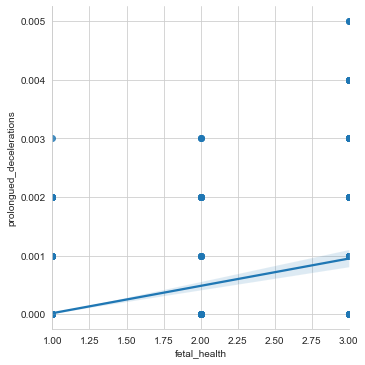

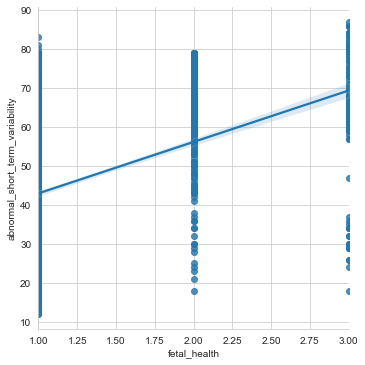

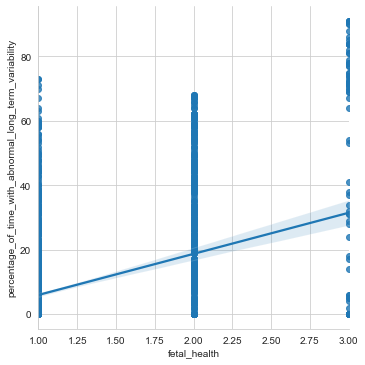

In [31]:
#plotting a linear regression model to further look at correlation

sns.lmplot(x ='fetal_health', y = 'prolongued_decelerations', data = df2)
sns.lmplot(x ='fetal_health', y = 'abnormal_short_term_variability', data = df2)
sns.lmplot(x ='fetal_health', y = 'percentage_of_time_with_abnormal_long_term_variability', data = df2)

## Train- Test Split and Preprocessing

In [33]:
#Logistic Regression
#Feature Selection choosing the variables for the model 
#feature selection

column = ['prolongued_decelerations', 'abnormal_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability']


X = pd.DataFrame(df2.drop(['fetal_health'], axis = 1), columns = column)

y = df2['fetal_health']


In [34]:
#splitting the model into test and train sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1488, 3), (638, 3), (1488,), (638,))

In [35]:
#Preprocessing

scaleX = StandardScaler()
X_train = scaleX.fit_transform(X_train)
X_test = scaleX.transform(X_test)

# Model Building

In [36]:
LR = LogisticRegression()

LR_mod = LR.fit(X_train, y_train)

LR_mod.score(X_test, y_test)

LR_predict = LR_mod.predict(X_test)

#evaluation with a classification report
print(classification_report(y_test, LR_predict))


              precision    recall  f1-score   support

         1.0       0.88      0.96      0.92       494
         2.0       0.59      0.43      0.50        86
         3.0       0.92      0.57      0.70        58

    accuracy                           0.86       638
   macro avg       0.80      0.65      0.71       638
weighted avg       0.85      0.86      0.84       638



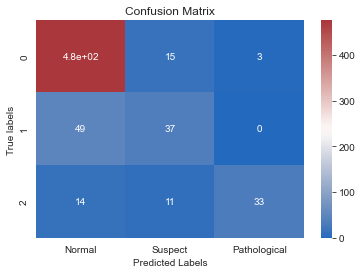

In [53]:
# Evaluation of LR model
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test, LR_predict), annot = True, ax = ax, cmap = 'vlag')
ax.set_xlabel('Predicted Labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Normal', 'Suspect', 'Pathological']);
#ax.yaxis.set_ticklabels(['1', '2', '3'])

In [56]:
#KNN Model 
knn = KNeighborsClassifier(n_neighbors=7, p=2, metric='euclidean')
knn.fit(X_train, y_train)

knn_predict = knn.predict(X_test)

print(classification_report(y_test, knn_predict))

              precision    recall  f1-score   support

         1.0       0.91      0.96      0.93       494
         2.0       0.67      0.59      0.63        86
         3.0       0.95      0.72      0.82        58

    accuracy                           0.89       638
   macro avg       0.85      0.76      0.80       638
weighted avg       0.88      0.89      0.88       638



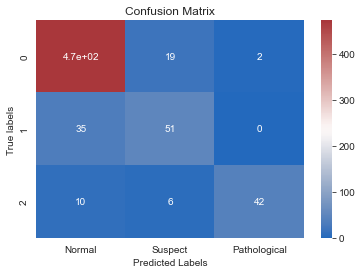

In [54]:
#Evaluation of KNN with Confusion Matrix

ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test, knn_predict), annot = True, ax = ax, cmap = 'vlag')
ax.set_xlabel('Predicted Labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Normal', 'Suspect', 'Pathological']);
#ax.yaxis.set_ticklabels(['1', '2', '3'])

In [46]:
#Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state = 0)
rfc = rfc.fit(X_train, y_train)

#predicting test results
rfc_predict = rfc.predict(X_test)
rfc.score(X_test, y_test)

print(classification_report(y_test, rfc_predict))

              precision    recall  f1-score   support

         1.0       0.91      0.95      0.93       494
         2.0       0.72      0.57      0.64        86
         3.0       0.85      0.81      0.83        58

    accuracy                           0.89       638
   macro avg       0.83      0.78      0.80       638
weighted avg       0.88      0.89      0.88       638



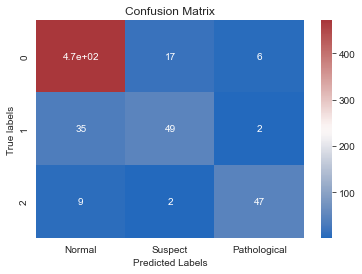

In [55]:
#Evaluation of Random Forest Classifier

ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test, rfc_predict), annot = True, ax = ax, cmap = 'vlag')
ax.set_xlabel('Predicted Labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Normal', 'Suspect', 'Pathological']);
#ax.yaxis.set_ticklabels(['1', '2', '3'])

In [48]:
# Sources
# https://www.kaggle.com/pariaagharabi/step-by-step-fetal-health-prediction-99-detailed
# https://towardsdatascience.com/end-to-end-data-science-example-predicting-diabetes-with-logistic-regression-db9bc88b4d16
# https://pub.towardsai.net/fully-explained-logistic-regression-with-python-f4a16413ddcd
# https://medium.com/swlh/random-forest-classification-and-its-implementation-d5d840dbead0
# https://medium.com/codex/machine-learning-logistic-regression-with-python-5ed4ded9d146
# https://towardsdatascience.com/model-evaluation-i-precision-and-recall-166ddb257c7b
# https://towardsdatascience.com/top-10-model-evaluation-metrics-for-classification-ml-models-a0a0f1d51b9
# https://medium.com/@kohlishivam5522/understanding-a-classification-report-for-your-machine-learning-model-88815e2ce397
# https://towardsdatascience.com/data-preparation-and-preprocessing-is-just-as-important-creating-the-actual-model-in-data-sciences-2c0562b65f62
# https://jyotibisht6114.medium.com/knn-algorithm-for-beginners-building-iris-species-prediction-model-69fea6c48979
# https://towardsdatascience.com/how-and-why-to-standardize-your-data-996926c2c832